# Introduction

### In this Project, I'm going to predict the Price of Used Cars using various features like Present_Price, Selling_Price, Kms_Driven, Fuel_Type, Year etc. The data used in this project was downloaded from Kaggle.

### To be able to predict used cars market value can help both buyers and sellers.

### There are lots of individuals who are interested in the used car market at some points in their life because they wanted to sell their car or buy a used car. In this process, it’s a big corner to pay too much or sell less then it’s market value.

In [3]:
#import the standard librires
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt
#import the sklearn librares
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math


# Loading the dataset


In [7]:
df=pd.read_csv("car data.csv")

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Getting info of the data

In [10]:
df.shape

(301, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
df.describe().style.background_gradient(cmap='pink')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Forming the correlation matrix

In [22]:
corr=data.corr(numeric_only = True).style.background_gradient(cmap='gray')
corr

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


## Let's visualize the correlation matrix using the seaborn library

<Axes: >

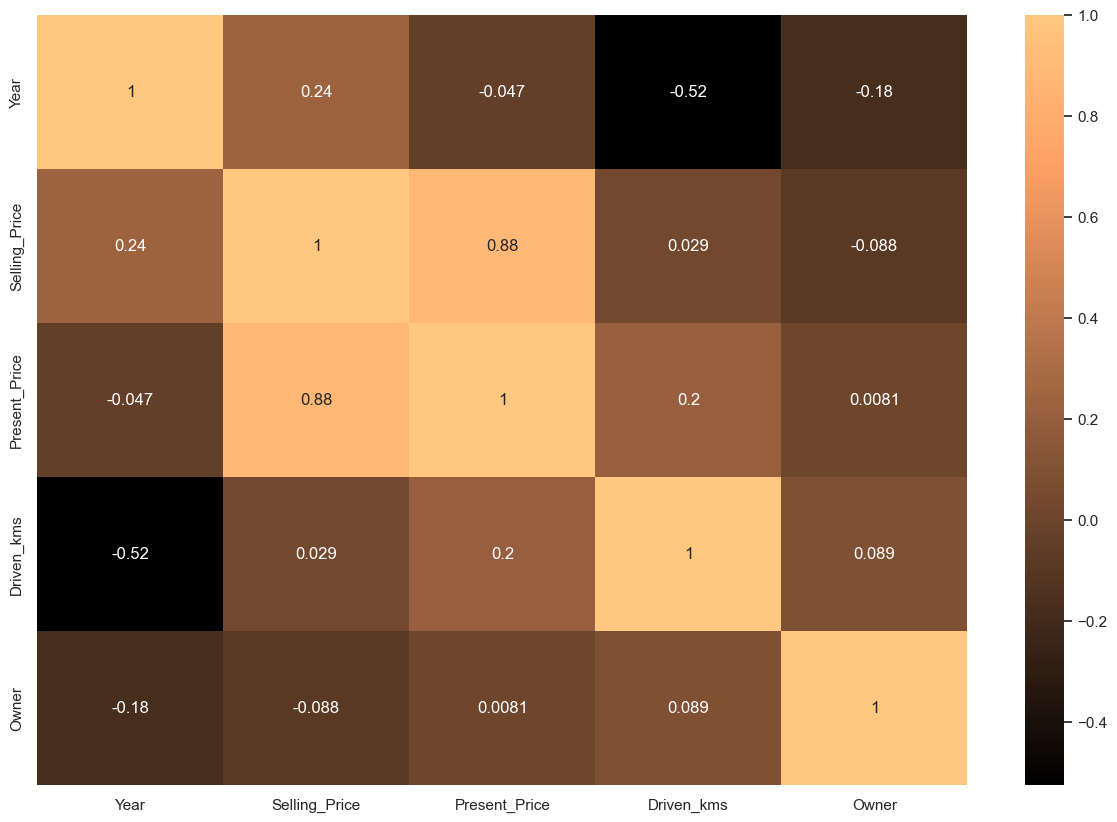

In [28]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(numeric_only = True),annot=True,cmap='copper')

In [29]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [30]:
#checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [31]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

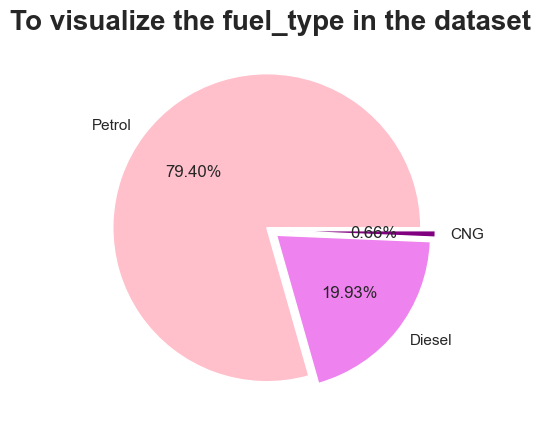

In [38]:

fuel_type=data['Fuel_Type'].value_counts()
#To visualize the top 20 car's sold
label=['Petrol','Diesel','CNG']
plt.figure(figsize=(5,5))
plt.pie(fuel_type,labels=label, autopct='%1.2f%%',explode=[0.03,0.05,0.07],colors=['pink','violet','purple'])
plt.title("To visualize the fuel_type in the dataset",fontsize=20,fontweight='bold')
plt.show()

## To visualize the year in the dataset

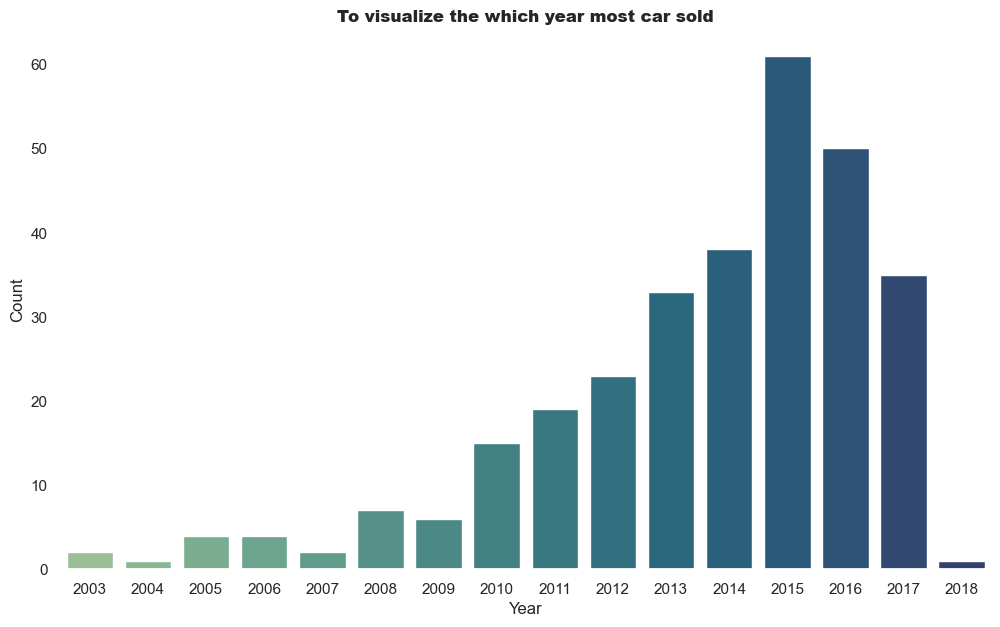

In [49]:

year=data['Year'].value_counts()
#to visualize the year in the seaborn barplot
ax=plt.axes()
#set the background color
ax.set(facecolor='white')
#set the figures size 
sns.set(rc={'figure.figsize':(12,7)},style='darkgrid')
#set the title of the plot
ax.set_title("To visualize the which year most car sold",fontsize=12,fontweight=900)
#let's visualize the barplot
sns.barplot(x=year.index,y=year,palette='crest')
#on the x axis
plt.xlabel("Year")
#on the y_axis
plt.ylabel("Count")
#let's visualize the image
plt.show()

# Let's visualize the car names in the dataset

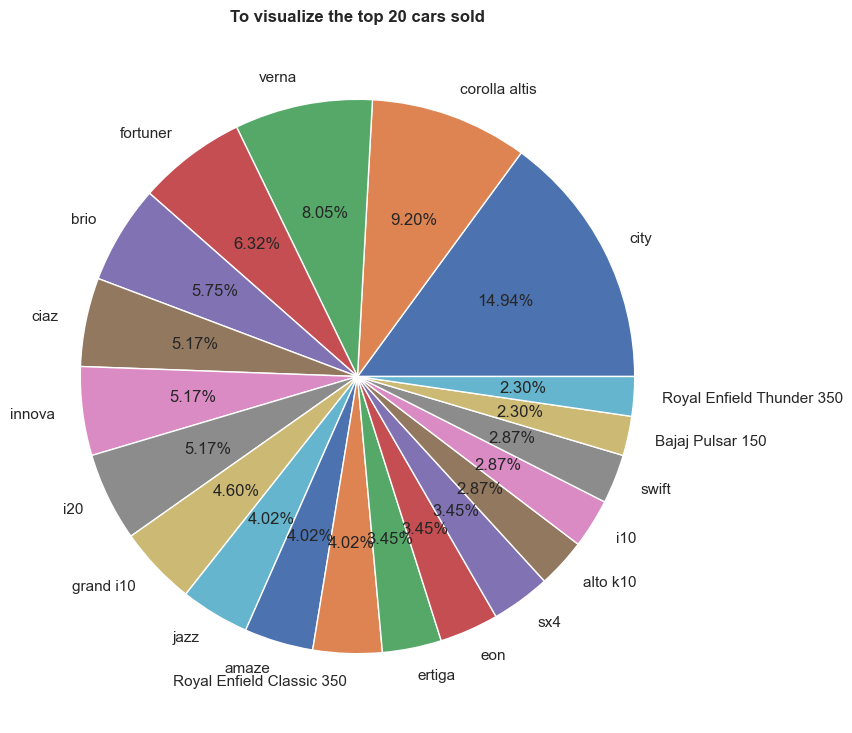

In [53]:
car_names=data['Car_Name'].value_counts()
#To visualize the top 20 car's sold
label=['city','corolla altis','verna','fortuner','brio','ciaz','innova','i20','grand i10','jazz','amaze','Royal Enfield Classic 350','ertiga','eon','sx4','alto k10','i10','swift','Bajaj Pulsar 150','Royal Enfield Thunder 350']
plt.figure(figsize=(10,9))
plt.pie(car_names[:20],labels=label, autopct='%1.2f%%')
plt.title("To visualize the top 20 cars sold",fontsize=12,fontweight='bold')
plt.show()

In [56]:
df.Selling_type.value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [57]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [58]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace = True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


<Axes: xlabel='Selling_Price', ylabel='Count'>

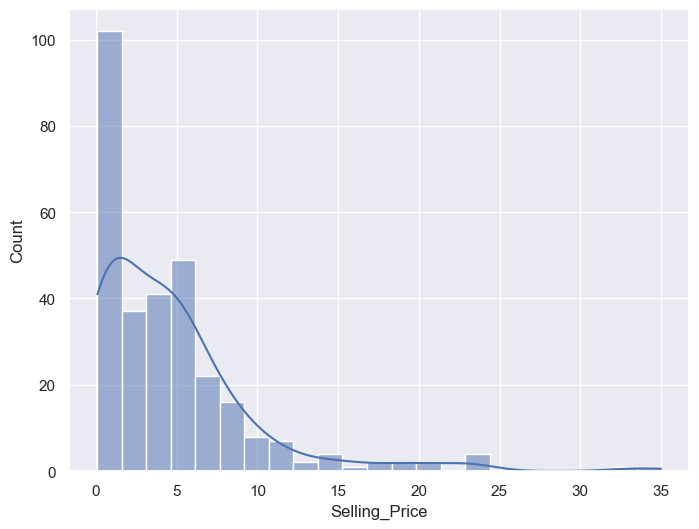

In [59]:
import seaborn as sns
sns.histplot(df['Selling_Price'],kde= True)

In [60]:
# X= df[['Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner']]
X =df.drop(['Car_Name','Selling_Price'],axis =1)
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [61]:
y = df['Selling_Price']

## Model Building and testing accuracies

In [62]:
#Let's import the labelencoder covert the categorical data to numerical
from sklearn.preprocessing import LabelEncoder,StandardScaler
label=LabelEncoder()
data['Car_Name']=label.fit_transform(data['Car_Name'])
data['Fuel_Type']=label.fit_transform(data['Fuel_Type'])
data['Selling_type']=label.fit_transform(data['Selling_type'])
data['Transmission']=label.fit_transform(data['Transmission'])

In [63]:
#normalize the data
scaler=StandardScaler()
#Let's normalize the train dataset
X=scaler.fit_transform(X)

In [64]:
#divided the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [65]:
#Install the Linear regression model
linear=LinearRegression()
#let's fi the train data
linear.fit(X_train,y_train)
#Prediction of the test data
linear_pred=linear.predict(X_test)

In [66]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {linear.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {linear.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 87.50
The Train_accuracy: 87.75


In [67]:
#Linear regression mean_squared_error and r2_score
mse=mean_squared_error(y_test,linear_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error LinearRegression {:.4f}".format(rmse))
print("R2_score LinearRegression {:4f}".format(r2_score(y_test,linear_pred)))
print("mean_absolute_error LinearRegression {:4f}".format(mean_absolute_error(y_test,linear_pred)))

Root_mean_squred_error LinearRegression 1.8529
R2_score LinearRegression 0.875032
mean_absolute_error LinearRegression 1.233097


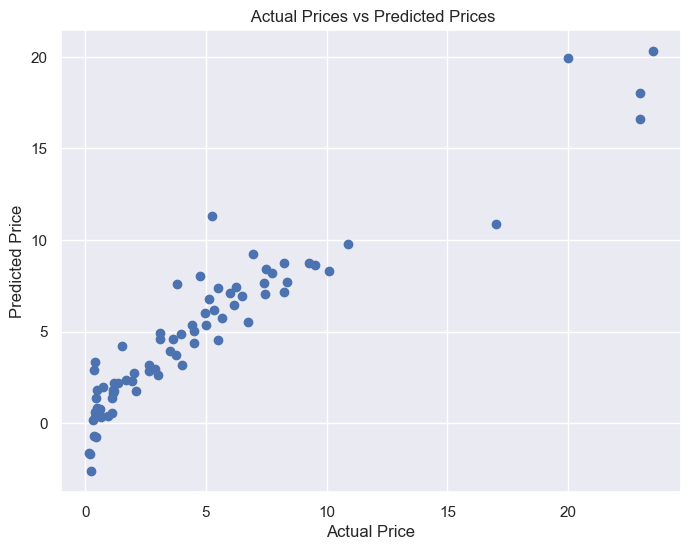

In [69]:
plt.scatter(y_test, linear_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [70]:
#Install the decisiontreeregressor from sklearn
from sklearn.tree import DecisionTreeRegressor
#install the model
tree=DecisionTreeRegressor(random_state=0)
#and fit the train data to the model
tree.fit(X_train,y_train)
#Prediction of the test dataset
tree_pred=tree.predict(X_test)

In [71]:
#Check the test score and train score to the DecisionTreeRegressor algorithm
print(f'The Test_accuracy: {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 94.97
The Train_accuracy: 100.00


In [72]:
#DecisionTreeRegressor mean_squared_error , r2_score
mse=mean_squared_error(y_test,tree_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error DecisionTreeRegressor {:.4f}".format(rmse))
print("R2_score DecisionTreeRegressor {:4f}".format(r2_score(y_test,tree_pred)))
print("mean_absolute_error DecisionTreeRegressor {:4f}".format(mean_absolute_error(y_test,tree_pred)))

Root_mean_squred_error DecisionTreeRegressor 1.1756
R2_score DecisionTreeRegressor 0.949698
mean_absolute_error DecisionTreeRegressor 0.752632


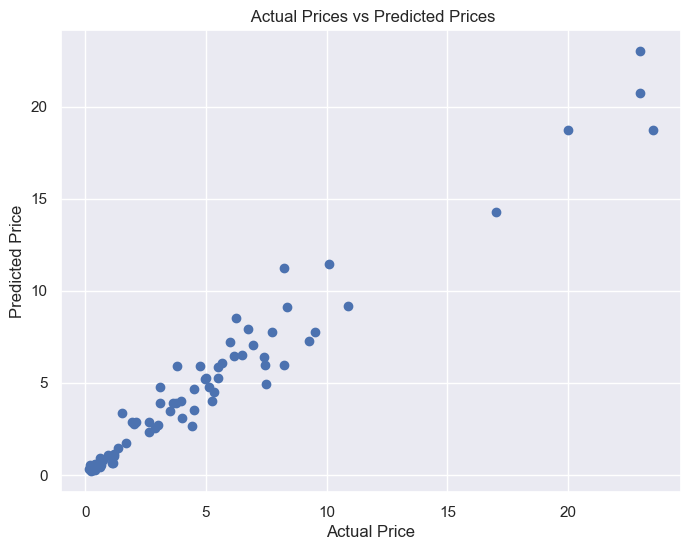

In [73]:
plt.scatter(y_test, tree_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()